# Librerías y carga de datos

In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')
# datos
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
datos.columns
datos.dtypes

Observaciones y variables:  (17907, 51)
Columnas y tipo de dato


Unnamed: 0                    int64
X                             int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Preferred.Foot               object
International.Reputation      int64
Weak.Foot                     int64
Skill.Moves                   int64
Height                       object
Weight                       object
Crossing                      int64
Finishing                     int64
HeadingAccuracy               int64
ShortPassing                  int64
Volleys                       int64
Dribbling                     int64
Curve                         int64
FKAccuracy                    int64
LongPassing                   int64
BallControl                   int64
Acceleration                  int64
SprintSpeed                   int64
Agility                       int64
Reactions                   

# Dispersión de los datos

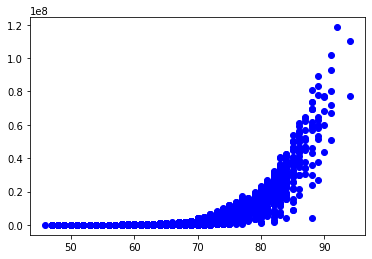

In [2]:
plt.plot(datos['Overall'], datos['Valor'], 'o', color= 'blue')

## Datos de entrenamiento y validación

In [3]:
overall = datos[['Overall']].to_numpy()
valor = datos[['Valor']].to_numpy()

overall_train, overall_test, valor_train, valor_test = train_test_split(overall, valor, test_size=0.3, random_state=2022)
overall_train

array([[54],
       [63],
       [64],
       ...,
       [70],
       [56],
       [76]], dtype=int64)

## Modelos de regresión

### Regresión lineal simple

In [4]:
modelo_ls = LinearRegression()
modelo_ls.fit(overall_train, valor_train)

LinearRegression()

### Coeficientes del modelo

In [5]:
a = modelo_ls.intercept_
b = modelo_ls.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-31408538.06038746]
Valor de b;  [[511065.1225897]]


### Linea de tendencia del modelo

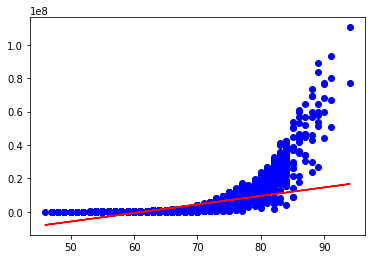

In [6]:
linea_tendencia = modelo_ls.predict(overall_train)
plt.plot(overall_train, valor_train, 'o', color= 'blue')
plt.plot(overall_train, linea_tendencia, color="red")

### Predicciones

In [7]:
predicciones = modelo_ls.predict(overall_test)
predicciones

array([[-1766760.95018502],
       [ 6410281.01125014],
       [ 5388150.76607075],
       ...,
       [ 9476671.74678832],
       [ -233565.58241593],
       [ 4366020.52089135]])

### Determinando métricas

In [8]:
diccionario = {'Overall': overall_test .flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones

,Overall,Real,Predicho
0,58,270000,-1.766761e+06
1,74,7500000,6.410281e+06
2,72,1600000,5.388151e+06
3,61,240000,-2.335656e+05
4,67,750000,2.832825e+06
...,...,...,...
5368,64,675000,1.299630e+06
5369,62,400000,2.774995e+05
5370,80,6000000,9.476672e+06
5371,61,290000,-2.335656e+05


### R2

In [9]:
# r = np.corrcoef(overall_train.flatten().tolist(), valor_train.flatten().tolist())
# r = r ** 2
# r = r.reshape(-1,2)
# r = r[0, 1]
# print('R Square :', np.round(r, 4) )

# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.3831
R Square : 0.38299355370512567


### RMSE

In [10]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

Mean Squared Error: MSE 20862415870369.51
Root Mean Squared Error RMSE: 4567539.367139544


## Modelo de Regresión Polinomial de segundo nivel

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 2)
overall_poly = poly_reg.fit_transform(overall_train)
modelo_poly2 = LinearRegression()
modelo_poly2.fit(overall_poly, valor_train)

LinearRegression()

## Curva de tendencia

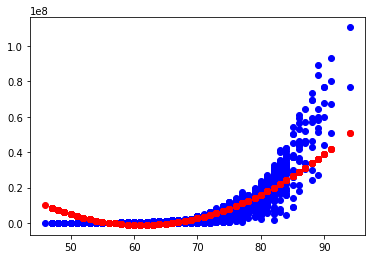

In [12]:
#                     model.predict(overall_poly)
curva_tendencia = modelo_poly2.predict(poly_reg.fit_transform(overall_train))
plt.scatter(overall_train, valor_train, color = 'b', )
plt.scatter(overall_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

### Predicciones

In [13]:
predicciones = modelo_poly2.predict(poly_reg.fit_transform(overall_test))
predicciones

array([[ -631932.43541938],
       [ 6840320.9437508 ],
       [ 4550834.29102236],
       ...,
       [16032418.01107705],
       [-1118840.07800195],
       [ 2648620.48981732]])

### Determinando métricas

In [14]:
diccionario = {'Overall': overall_test.flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)

,Overall,Real,Predicho
0,58,270000,-6.319324e+05
1,74,7500000,6.840321e+06
2,72,1600000,4.550834e+06
3,61,240000,-1.118840e+06
4,67,750000,5.214364e+05
5,74,4800000,6.840321e+06
6,55,120000,7.263391e+05
7,56,190000,1.767637e+05
8,63,375000,-9.593541e+05
9,64,475000,-7.343838e+05


### R2

In [15]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.7415
R Square : 0.7410581411870366


### RMSE

In [16]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

Mean Squared Error: MSE 8755423508526.52
Root Mean Squared Error RMSE: 2958956.48979949


### Modelo de Regresión Polinomial de segundo nivel

In [17]:
poly_reg =  PolynomialFeatures(degree = 5)
overall_poly = poly_reg.fit_transform(overall_train)
modelo_poly5 = LinearRegression()
modelo_poly5.fit(overall_poly, valor_train)

LinearRegression()

### Curva de tendencia

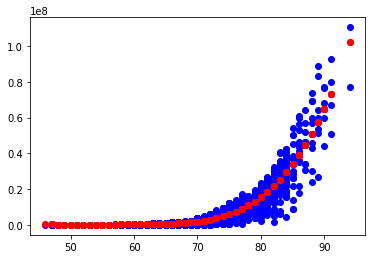

In [18]:
curva_tendencia = modelo_poly5.predict(poly_reg.fit_transform(overall_train))
plt.scatter(overall_train, valor_train, color = 'b', )
plt.scatter(overall_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

### Predicciones

In [19]:
predicciones = modelo_poly5.predict(poly_reg.fit_transform(overall_test))
predicciones

array([[  244139.09028995],
       [ 4806814.81309664],
       [ 3018950.93247378],
       ...,
       [15593305.27817023],
       [  325564.65475619],
       [ 1833120.69130242]])

### Determinando métricas

In [20]:
diccionario = {'Overall': overall_test.flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)

,Overall,Real,Predicho
0,58,270000,2.441391e+05
1,74,7500000,4.806815e+06
2,72,1600000,3.018951e+06
3,61,240000,3.255647e+05
4,67,750000,8.540910e+05
5,74,4800000,4.806815e+06
6,55,120000,1.272642e+05
7,56,190000,1.703981e+05
8,63,375000,3.984358e+05
9,64,475000,4.592927e+05


### R2

In [21]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.8953
R Square : 0.8930997450921092


### RMSE

In [22]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

Mean Squared Error: MSE 3614545014771.3525
Root Mean Squared Error RMSE: 1901195.680294733


# Apreciación personal e Interpretación
## Descripción
En este caso trataré de trazar la recta de tendencia con la relación que tiene la edad del jugador con su potencial, esto sólo de los primeros 3000 jugadores.

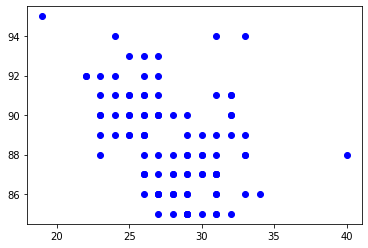

In [39]:
datos = datos.head(3000)
plt.plot(datos['Age'], datos['Potential'], 'o', color= 'blue')

## Datos de entrenamiento y validación

In [43]:
age = datos[['Age']].to_numpy()
pot = datos[['Potential']].to_numpy()

age_train, age_test, pot_train, pot_test = train_test_split(age, pot, random_state=2022)
age_train

array([[25],
       [25],
       [31],
       [27],
       [29],
       [26],
       [29],
       [33],
       [19],
       [27],
       [31],
       [26],
       [26],
       [23],
       [32],
       [25],
       [26],
       [25],
       [25],
       [30],
       [29],
       [29],
       [28],
       [32],
       [33],
       [29],
       [26],
       [28],
       [31],
       [29],
       [23],
       [31],
       [25],
       [23],
       [31],
       [31],
       [29],
       [26],
       [27],
       [29],
       [27],
       [29],
       [24],
       [30],
       [32],
       [24],
       [32],
       [32],
       [23],
       [31],
       [30],
       [24],
       [26],
       [27],
       [31],
       [27],
       [28],
       [30],
       [26],
       [28],
       [33],
       [26],
       [28],
       [26],
       [29],
       [40],
       [30],
       [24],
       [33],
       [26],
       [27],
       [22],
       [29],
       [25],
       [28]], dtype=int64)

## Modelos de regresión

### Regresión lineal simple

In [44]:
modelo_ls = LinearRegression()
modelo_ls.fit(age_train, pot_train)

LinearRegression()

### Coeficientes del modelo

In [46]:
a = modelo_ls.intercept_
b = modelo_ls.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [96.70535743]
Valor de b;  [[-0.2833501]]


### Linea de tendencia del modelo

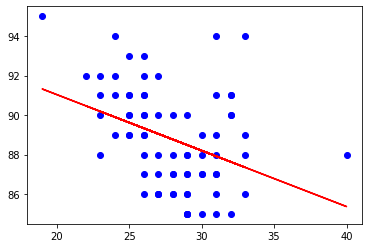

In [47]:
linea_tendencia = modelo_ls.predict(age_train)
plt.plot(age_train, pot_train, 'o', color= 'blue')
plt.plot(age_train, linea_tendencia, color="red")

Como podemos observar, la línea de tendencia va de más a menos. Esto se debe a que los jugadores jóvenes tienen más potencial que los jugadores veteranos, esto por lógica natural de la vida.

### Predicciones

In [50]:
predicciones = modelo_ls.predict(age_test)
predicciones

array([[90.47165526],
       [87.07145407],
       [90.18830516],
       [89.05490476],
       [88.20485446],
       [89.90495506],
       [87.63815427],
       [87.92150436],
       [89.05490476],
       [89.33825486],
       [88.48820456],
       [89.05490476],
       [88.77155466],
       [90.18830516],
       [87.35480417],
       [89.05490476],
       [87.92150436],
       [89.05490476],
       [89.33825486],
       [88.77155466],
       [89.33825486],
       [89.05490476],
       [87.92150436],
       [88.48820456],
       [87.92150436]])

### Determinando métricas

In [60]:
diccionario = {'Edad': age_test .flatten().tolist(),
                'PotReal' : pot_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.groupby(["Edad"]).mean().astype(int).sort_values(by=["Edad"])

,PotReal,Predicho
Edad,,
22,92,90
23,89,90
24,90,89
26,87,89
27,89,89
28,85,88
29,87,88
30,88,88
31,86,87


Como podemos observar, varias de las medias reales según cada edad, varían sólo un póco con respecto a lo predicho por el modelo. Donde la medía que más se distancia, es por una diferencia de sólo 2 puntos.

### R2

In [61]:
r = np.corrcoef(comparaciones['PotReal'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['PotReal'], comparaciones['Predicho'] ))

R Square : 0.2288
R Square : 0.09942699825281909


El cálculo de R square proporcionado por la librería de NumPy tiene más certeza que la proporcionada por la librería sklearn.metrics. Aún así, ambas medidas están muy por debajo de una certeza promedio. 

### RMSE

In [62]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(pot_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pot_test, predicciones)))

Mean Squared Error: MSE 4.538887928805791
Root Mean Squared Error RMSE: 2.1304665988477245


## Modelo de Regresión Polinomial de segundo nivel

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 2)
age_poly = poly_reg.fit_transform(age_train)
modelo_poly2 = LinearRegression()
modelo_poly2.fit(age_poly, pot_train)

LinearRegression()

## Curva de tendencia

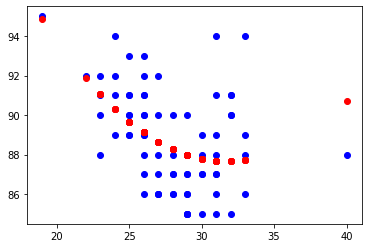

In [66]:
#                     model.predict(overall_poly)
curva_tendencia = modelo_poly2.predict(poly_reg.fit_transform(age_train))
plt.scatter(age_train, pot_train, color = 'b', )
plt.scatter(age_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

Como podemos observar, la curva de tendencia empeiza por aproximadamente los 95 puntos, esto por todos los jugadores promesas, tiene su punto mínimo con los jugadores de 30 años, aunque aún así, una media de 88 puntos es muy buena y esta seguro se mantiene por todos los jugadores generacionales, por ejemplo Toni Kroos, Marco Reus, o el mismo Messi. La curva se recupera un poco al llegar a los jugadores de 40 años. Esto seguro gracias a jugadores como Gianluigi Buffon, que en 2020 tenía 41 años y una media de 83 puntos, una muy buena media para su edad.

### Predicciones

In [67]:
predicciones = modelo_poly2.predict(poly_reg.fit_transform(age_test))
predicciones

array([[91.86222809],
       [87.89627564],
       [91.04401927],
       [88.65793449],
       [87.79945895],
       [90.31448549],
       [87.67051719],
       [87.69065055],
       [88.65793449],
       [89.12144311],
       [87.99694241],
       [88.65793449],
       [88.28310093],
       [91.04401927],
       [87.73905889],
       [88.65793449],
       [87.69065055],
       [88.65793449],
       [89.12144311],
       [88.28310093],
       [89.12144311],
       [88.65793449],
       [87.69065055],
       [87.99694241],
       [87.69065055]])

### Determinando métricas

In [74]:
diccionario = {'Edad': age_test.flatten().tolist(),
                'Real' : pot_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.groupby(["Edad"]).mean().astype(int).sort_values(by=["Edad"])

,Real,Predicho
Edad,,
22,92,91
23,89,91
24,90,90
26,87,89
27,89,88
28,85,88
29,87,87
30,88,87
31,86,87


Esta vez, la métrica es igual a la presentada unos cuantos puntos arriba.

### R2

In [75]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.2673
R Square : 0.16436090540509085


Como podemos observar, la certeza del R square no mejora, ya que sigue estancado sin poder subir de 30% con cualquier de los 2 resultados.

### RMSE

In [78]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(pot_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pot_test, predicciones)))

Mean Squared Error: MSE 4.211621036758342
Root Mean Squared Error RMSE: 2.052223437337743


### Modelo de Regresión Polinomial de segundo nivel

In [79]:
poly_reg =  PolynomialFeatures(degree = 5)
age_poly = poly_reg.fit_transform(age_train)
modelo_poly5 = LinearRegression()
modelo_poly5.fit(age_poly, pot_train)

LinearRegression()

### Curva de tendencia

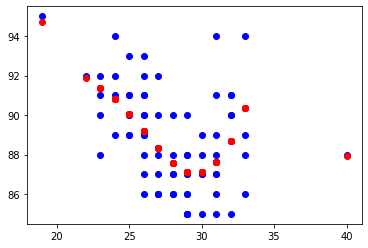

In [80]:
curva_tendencia = modelo_poly5.predict(poly_reg.fit_transform(age_train))
plt.scatter(age_train, pot_train, color = 'b', )
plt.scatter(age_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

Como podemos observar, la curva se mantiene de una manera similar a la mostrada unos renglones arriba. Sólo que esta vez parece ser una curva dada por una expresión cúbica. Con esto me refiero a que la curva tiene 4 puntos de inflexión. Siendo estos cuando la edad es de 19, la media es de ~95, cuando la edad es 30 baja a ~87 puntos, sube a ~90 puntos con unos ~33/~34 años y vuelve a bajar con la edad de 40 años a los ~88 puntos de media.

### Predicciones

In [81]:
predicciones = modelo_poly5.predict(poly_reg.fit_transform(age_test))
predicciones

array([[91.86112967],
       [92.44187873],
       [91.39171768],
       [88.3405099 ],
       [87.10986182],
       [90.80647368],
       [88.70221054],
       [87.61166754],
       [88.3405099 ],
       [89.20818161],
       [87.14307104],
       [88.3405099 ],
       [87.60107773],
       [91.39171768],
       [90.35537747],
       [88.3405099 ],
       [87.61166754],
       [88.3405099 ],
       [89.20818161],
       [87.60107773],
       [89.20818161],
       [88.3405099 ],
       [87.61166754],
       [87.14307104],
       [87.61166754]])

### Determinando métricas

In [82]:
diccionario = {'Edad': age_test.flatten().tolist(),
                'Real' : pot_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.groupby(["Edad"]).mean().astype(int).sort_values(by=["Edad"])

,Real,Predicho
Edad,,
22,92,91
23,89,91
24,90,90
26,87,89
27,89,88
28,85,87
29,87,87
30,88,87
31,86,87


Esta vez los datos cambian un poco, por ejemplo, a la edad de 34 años la media real es de 86 puntos, mientras que según lo predicho, deberían de tener 92 puntos de media. CR7 seguro ayuda mucho a ese campo, ya que en el FIFA 20, el bicho tenía una media de 93 puntos.

### R2

In [83]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.1222
R Square : -0.14693704973750932


### RMSE

In [84]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(pot_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pot_test, predicciones)))

Mean Squared Error: MSE 5.7805627306770475
Root Mean Squared Error RMSE: 2.4042800857381503


Por último, algo que si noté que se mantenía, eran los valores de MSE y RMSE, aunque variaban un poco, comparten cierta similitud sobre cada modelo hecho.